#Intro

This is the fifth practical homework for the ML seminar.  We will focus on some **clustering** algorithms and we will work with 2 datasets: the 2D dataset from the third HW and the MNIST dataset from the first HW.

Observation: when we apply the clustering algorithm, we will apply it only on the input columns (i.e. do not include the y variable! include only the X variable).

*To obtain 0.25 points you do not have to solve all the exercises! Pick your favourites!*

# Tasks

The tasks are as follows. 

1. Here we will work only with the **2D dataset**. 

Consider the following clustering algorithms:

- hierarchical clustering
  
  - with single-linkage

  - with complete-linkage
    
  - with average-linkage
    
  - with Ward's distance

- k-means.

For each of them:

a. Identify the natural number of clusters. Perhaps you will identify a range of possible values. Specify the range and pick any value from there.

b. Apply the clustering algorithm and get the clusters, given that the number of clusters is set to the value obtained at a.

c. Visualize the dataset in 2D by colouring the points in a cluster with the same colour.

2. Here we will work only with the **MNIST dataset**.

Consider only the k-means algorithm. We want to see if the clustering results are somehow consistent with the original labels.

  a. Apply this algorithm on the dataset with k=10 (since we a priori know that there are 10 digits).

  b. Visualize the centroids of clusters as images.

  c. Create a contingency table: a matrix A where A[i,j] (i,j=0,..,9) is the number of digits i which are in cluster j; for example, A[1,2] = the number of ones (digits representing a one) which are in cluster number 2.

  d. What do you observe? Do the clusters somehow represent the 10 digits or not?

# Task 1

## Get dataset

In [179]:
!wget https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.tree
import sklearn.naive_bayes
from planar_utils_modified import plot_decision_boundary, load_planar_dataset, load_extra_datasets

%matplotlib inline

--2020-12-22 18:09:59--  https://raw.githubusercontent.com/aciobanusebi/ml2/master/planar_utils_modified.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2106 (2.1K) [text/plain]
Saving to: ‘planar_utils_modified.py.2’

planar_utils_modifi 100%[===================>]   2.06K  --.-KB/s    in 0s      

2020-12-22 18:09:59 (30.6 MB/s) - ‘planar_utils_modified.py.2’ saved [2106/2106]



In [180]:
X, y = load_planar_dataset()

Visualize the data

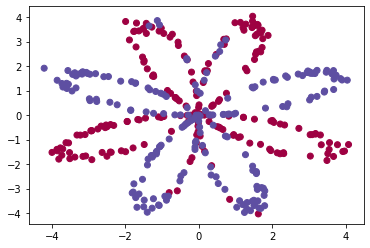

In [181]:
# Visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

## Task 1 - solution

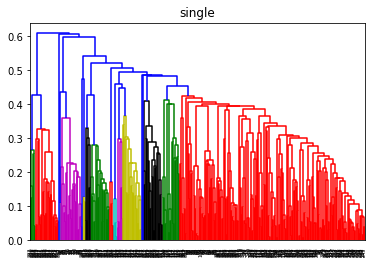

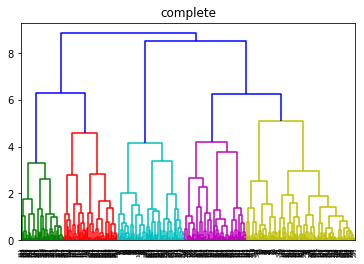

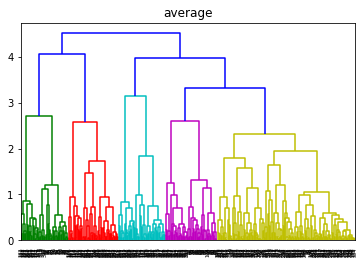

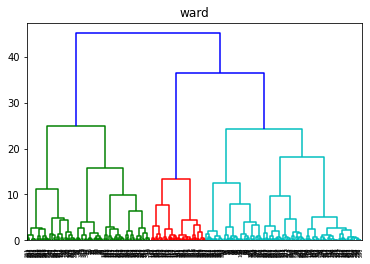

In [182]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

methods = ["single", "complete", "average", "ward", "kmeans"]

for method in methods:
  if method == "kmeans":
    break

  plt.figure()

  Z = linkage(X, method)
  figure = dendrogram(Z, count_sort=True)

  plt.title(method)
  plt.show()


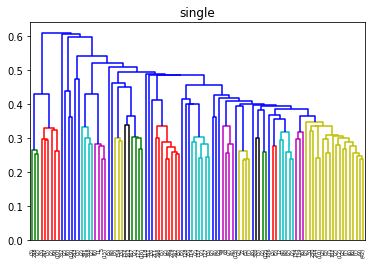

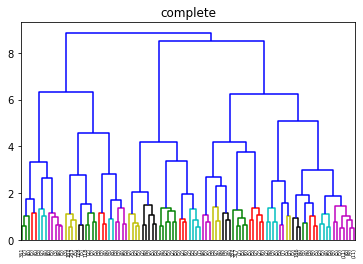

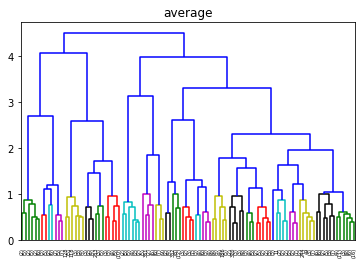

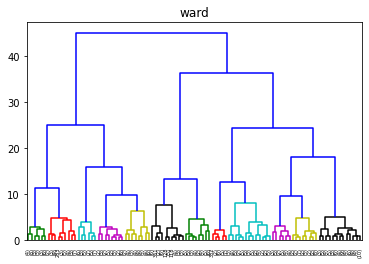

In [183]:
# thresh-holduri observate pe graficele de mai sus
tholds = {
    "single": 0.35,
    "complete": 1.5,
    "average": 1,
    "ward": 9
}

for method in methods:
  if method == "kmeans":
    break

  plt.figure()

  Z = linkage(X, method)
  figure = dendrogram(Z, count_sort=True, color_threshold = tholds[method], truncate_mode="lastp", p=100)

  plt.title(method)
  plt.show()



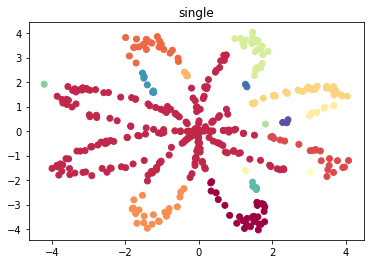

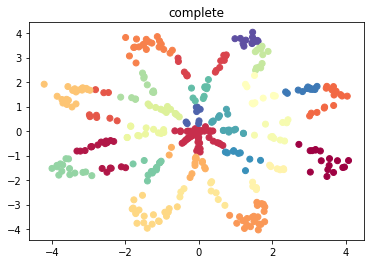

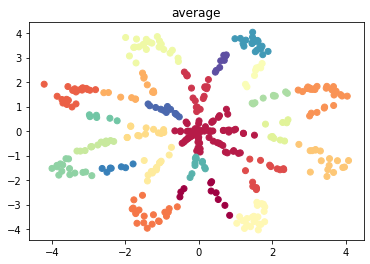

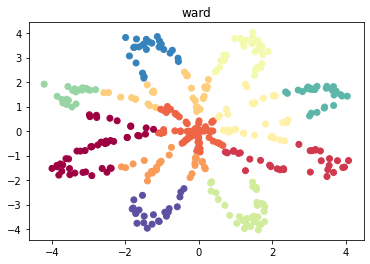

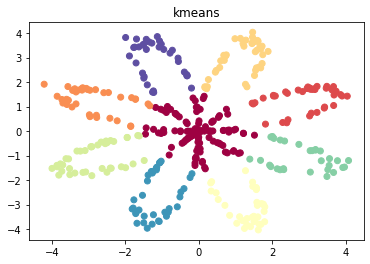

In [184]:
n = {
    "single": 17, # [17 ... 22] numarand pe dendrograme
    "complete": 27,
    "average": 24, 
    "ward": 12,
    "kmeans": 9 # [4 ... 9] din observatii vizuale
}

for method in methods:
  if method == "kmeans":
    model = KMeans(n_clusters=n[method]).fit_predict(X)
  else:
    model = AgglomerativeClustering(n_clusters=n[method], linkage=method).fit_predict(X)

  plt.title(method)
  plt.scatter(X[:, 0], X[:, 1], c=model, cmap=plt.cm.Spectral)
  plt.show()


# Task 2

## Get dataset

In [185]:
# Data is at: https://drive.google.com/file/d/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0/view?usp=sharing
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0" -O mnist_Xy.zip && rm -rf /tmp/cookies.txt

--2020-12-22 18:10:44--  https://docs.google.com/uc?export=download&confirm=&id=1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0
Resolving docs.google.com (docs.google.com)... 173.194.217.113, 173.194.217.101, 173.194.217.102, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-c4-docs.googleusercontent.com/docs/securesc/9bu9m3g5f0c21ncditb6co8tdntbtfra/hb55eb72kk80t08ov0g9k210l7pf843a/1608660600000/03293566965117062760/18290238397752427891Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download [following]
--2020-12-22 18:10:46--  https://doc-04-c4-docs.googleusercontent.com/docs/securesc/9bu9m3g5f0c21ncditb6co8tdntbtfra/hb55eb72kk80t08ov0g9k210l7pf843a/1608660600000/03293566965117062760/18290238397752427891Z/1b9I3lywpGKpFpJg9dXYmE5HMTgwTHgl0?e=download
Resolving doc-04-c4-docs.googleusercontent.com (doc-04-c4-docs.googleusercontent.com)... 172.217.204.132, 2607:f8b0:400c:c15::84
Connectin

In [186]:
!unzip mnist_Xy.zip

Archive:  mnist_Xy.zip
replace mnist_X.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace mnist_y.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [187]:
import numpy as np
X = np.load("mnist_X.npy")
y = np.load("mnist_y.npy")

## Task 2 - solution

In [191]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=10, random_state=0).fit(X)

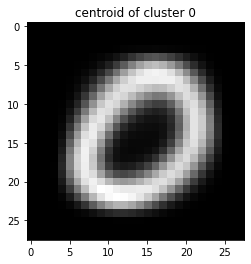

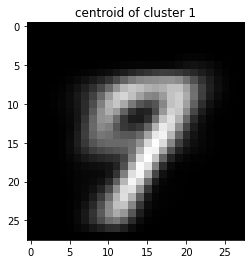

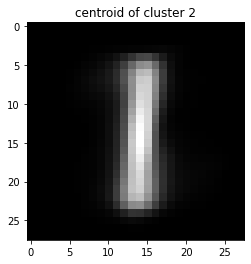

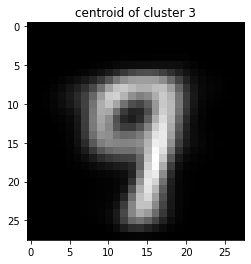

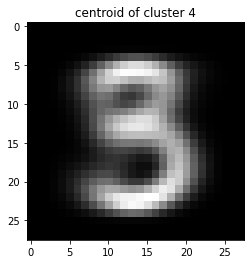

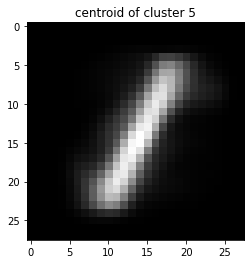

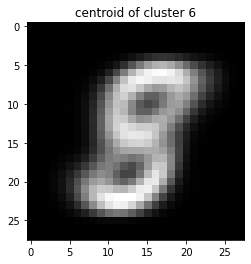

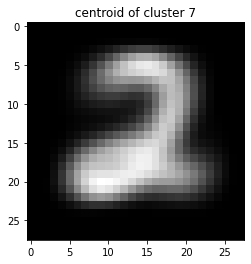

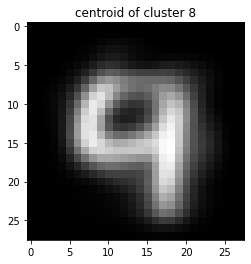

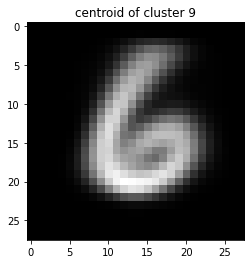

In [192]:
centroids = model.cluster_centers_
labels = model.labels_
clusters = model.predict(centroids)

for i in range(10):
  centroid = centroids[i]

  plt.title("centroid of cluster " + str(clusters[i]))
  plt.imshow(np.reshape(centroid, (28,28)), cmap="gray")
  plt.show()

In [193]:
A = [[0 for _ in range(10)] for _ in range(10)]

labels = model.labels_
ndigits = len(X)
clusters = model.predict(X)

for i in range(ndigits):
  digit = y[i]
  cluster = clusters[i]
  A[digit][cluster] += 1

correct = 0
for i in range(len(A)):
  for j in range(len(A[0])):
    print(A[i][j], end="\t")
    if i == j:
      correct += A[i][j]
  print()

acc = round(correct/ndigits, 2)
print("accuracy: " + str(acc))

5499	29	0	15	286	37	624	44	105	264	
0	7	4369	8	11	3451	7	10	3	11	
75	75	369	45	456	466	158	4901	270	175	
37	42	417	180	4592	96	1381	261	69	66	
4	1785	112	1933	0	273	13	17	2537	150	
69	327	131	358	2068	817	2161	21	207	154	
90	1	275	4	35	228	163	79	720	5281	
14	3374	246	2711	3	292	4	42	603	4	
36	261	294	254	1598	448	3670	50	153	61	
38	1995	147	2977	92	88	56	5	1550	10	
accuracy: 0.1


Clusterele nu reusesc sa reprezinte cele 10 cifre la un nivel acceptabil...